In [41]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['target']=california.target


In [33]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [37]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [38]:
df.shape

(20640, 9)

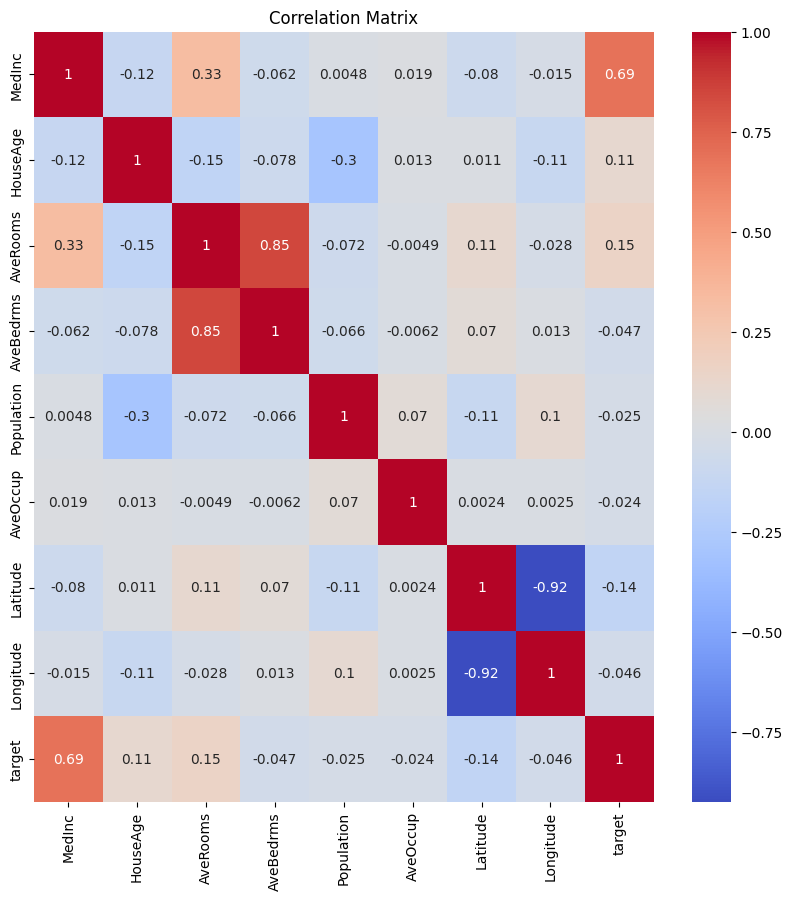

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [43]:
df.drop(['Longitude'],axis=1,inplace=True)
df['RoomsPerBedroom'] = df['AveRooms'] / df['AveBedrms']
df.drop(['AveRooms', 'AveBedrms'], axis=1, inplace=True)


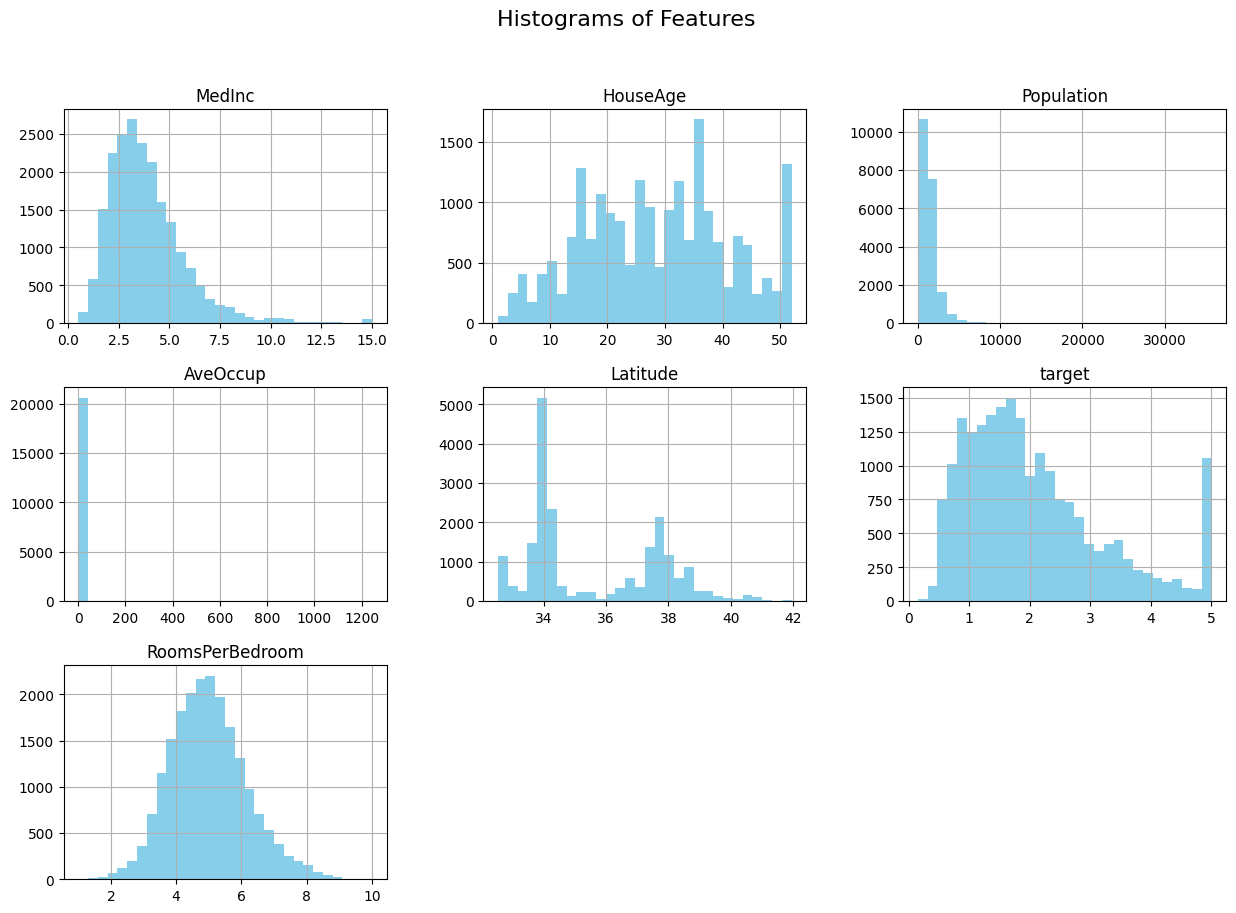

In [44]:


df.hist(bins=30, figsize=(15,10), color='skyblue')
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()


In [45]:
skew_values=df.skew().sort_values(ascending=False)
print(skew_values)

AveOccup           97.639561
Population          4.935858
MedInc              1.646657
target              0.977763
Latitude            0.465953
RoomsPerBedroom     0.339085
HouseAge            0.060331
dtype: float64


In [75]:
# Apply log1p transformation to reduce right skew
for col in ['AveOccup','Population','MedInc','target']:
  df[col]=np.log1p(df[col])

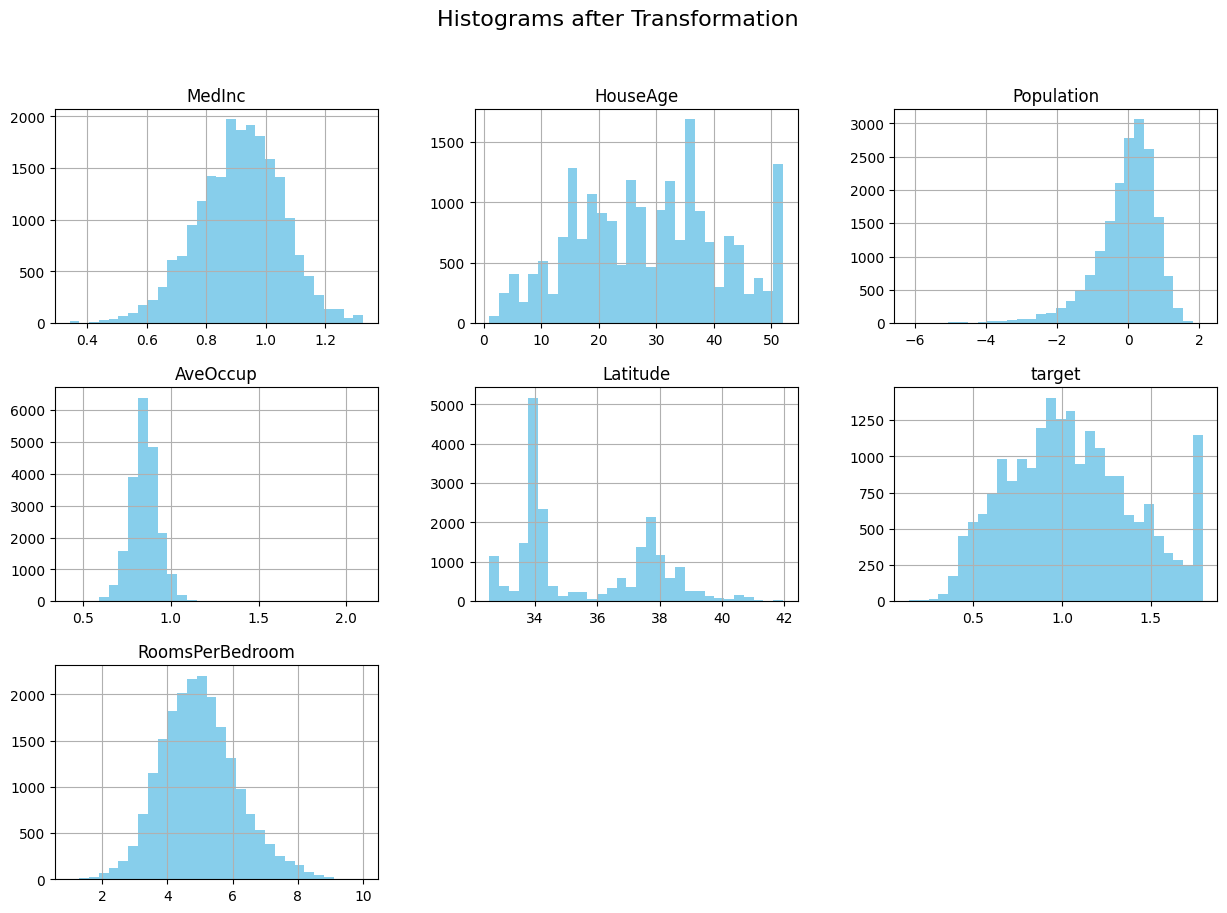

In [76]:
df.hist(bins=30, figsize=(15,10), color='skyblue')
plt.suptitle("Histograms after Transformation", fontsize=16)
plt.show()

In [77]:
skew_values=df.skew().sort_values(ascending=False)
print(skew_values)

AveOccup           0.960154
Latitude           0.465953
RoomsPerBedroom    0.339085
target             0.275939
HouseAge           0.060331
MedInc            -0.238036
Population        -1.639872
dtype: float64


In [49]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df['Population']=pt.fit_transform(df[['Population']])

In [78]:
skew_values=df.skew().sort_values(ascending=False)
print(skew_values)

AveOccup           0.960154
Latitude           0.465953
RoomsPerBedroom    0.339085
target             0.275939
HouseAge           0.060331
MedInc            -0.238036
Population        -1.639872
dtype: float64


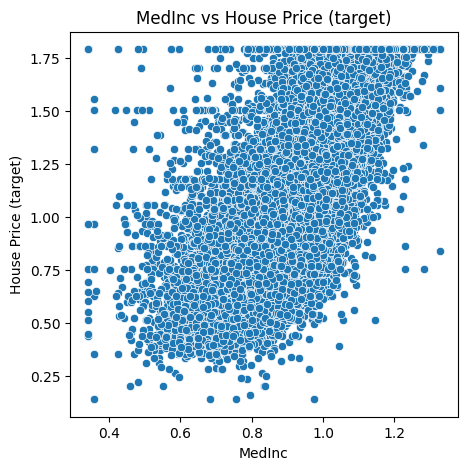

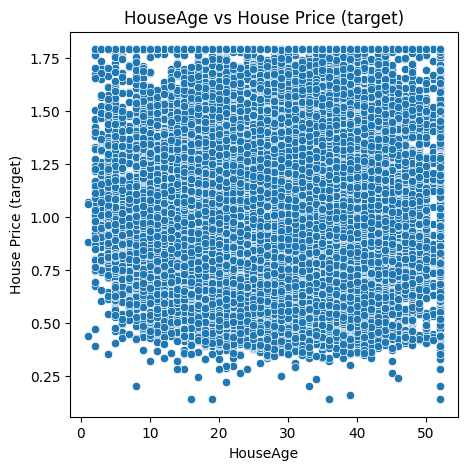

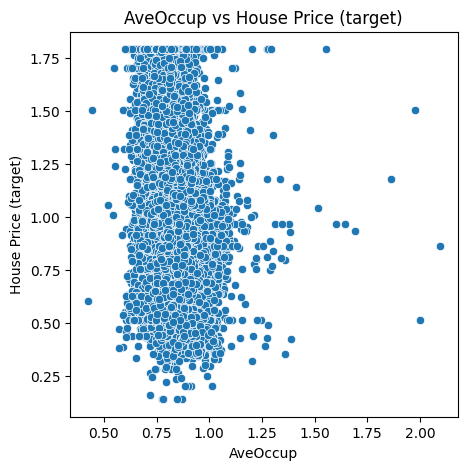

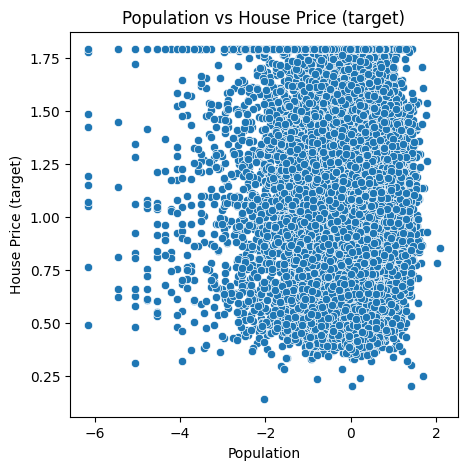

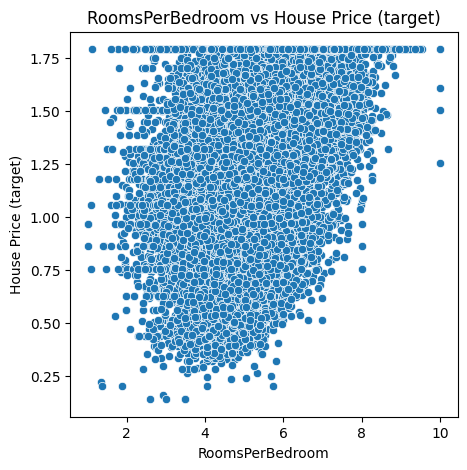

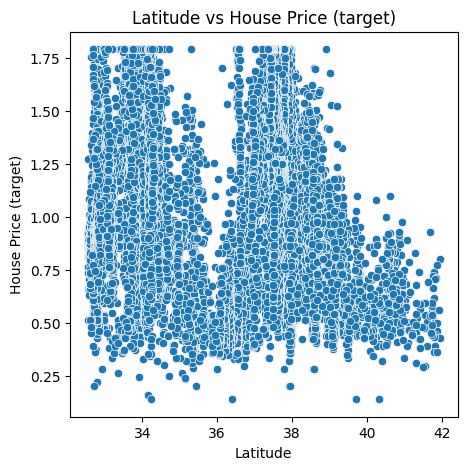

In [79]:
features=['MedInc', 'HouseAge', 'AveOccup', 'Population', 'RoomsPerBedroom', 'Latitude']
for feature in features:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=df[feature],y=df['target'])
  plt.title(f"{feature} vs House Price (target)")
  plt.xlabel(feature)
  plt.ylabel("House Price (target)")
  plt.show()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [81]:
X.shape

(20640, 6)

In [82]:
y.shape

(20640,)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [91]:
pd.DataFrame(X_train_scaled).isnull().sum()


,0
0,0
1,0
2,2005
3,0
4,0
5,0


In [92]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


In [93]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)



LinearRegression()

In [88]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [94]:
from sklearn.metrics import mean_squared_error,r2_score
lr_prediction=lr.predict(X_test_scaled)
rf_prediction=rf.predict(X_test_scaled)
print("Linear Regression - RMSE:", mean_squared_error(y_test, lr_prediction))
print("Linear Regression - R²:", r2_score(y_test, lr_prediction))
print("Random Forest - RMSE:", mean_squared_error(y_test, rf_prediction))
print("Random Forest - R²:", r2_score(y_test, rf_prediction))


Linear Regression - RMSE: 0.055442312740530464
Linear Regression - R²: 0.5601365708576139
Random Forest - RMSE: 0.03470105148475747
Random Forest - R²: 0.7246917968165216


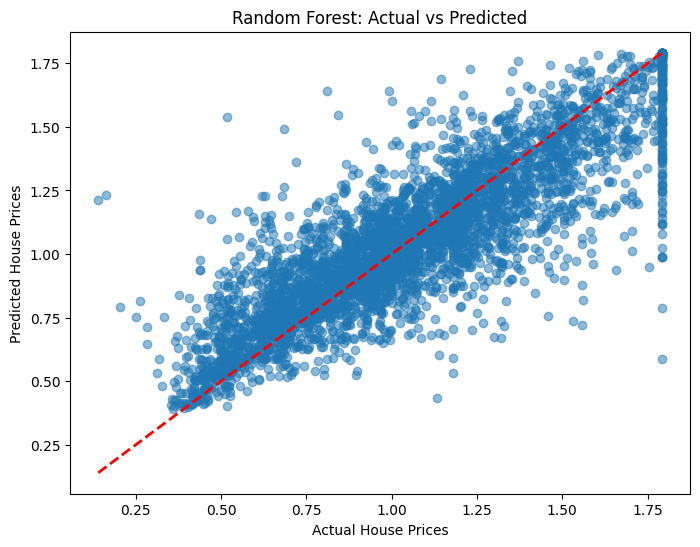

In [90]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

In [99]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and rf_predictions are on log scale (if you used np.log1p)
y_test_original = np.expm1(y_test)
rf_prediction_original = np.expm1(rf_prediction)

# Calculate metrics on original scale
rmse_original = mean_squared_error(y_test_original, rf_prediction_original)
r2_original = r2_score(y_test_original, rf_predictions_original)

print("Random Forest - RMSE (Original Scale):", rmse_original)
print("Random Forest - R² (Original Scale):", r2_original)

Random Forest - RMSE (Original Scale): 0.37594447725867947
Random Forest - R² (Original Scale): 0.7131090495401295


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Update the model with best parameters
best_rf_model = grid_search.best_estimator_
rf_prediction = best_rf_model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
rf_prediction_original = np.expm1(rf_prediction)
y_test_original = np.expm1(y_test)
print("Tuned Random Forest - RMSE (Original Scale):", mean_squared_error(y_test_original, rf_prediction_original))
print("Tuned Random Forest - R² (Original Scale):", r2_score(y_test_original, rf_prediction_original))

Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Best Cross-Validation Score: 0.7342983604584077
Tuned Random Forest - RMSE (Original Scale): 0.3745194315298914
Tuned Random Forest - R² (Original Scale): 0.7141965311984901


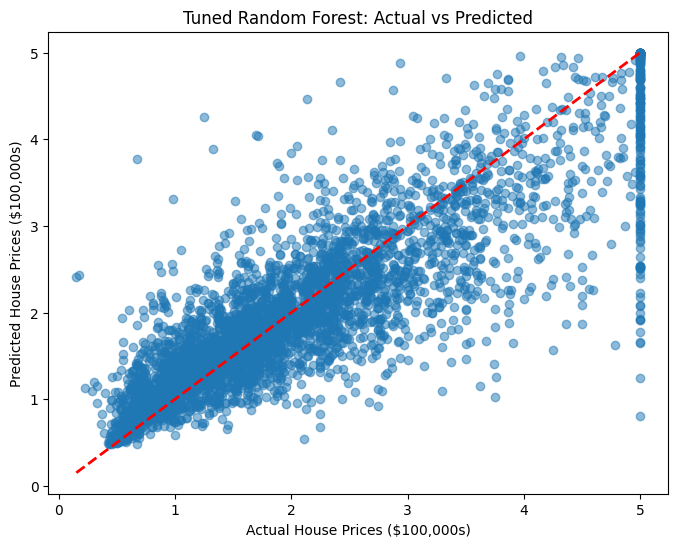

In [102]:
# Generate predictions with the tuned model
rf_prediction = best_rf_model.predict(X_test_scaled)
rf_prediction_original = np.expm1(rf_prediction)
y_test_original = np.expm1(y_test)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, rf_prediction_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices ($100,000s)")
plt.ylabel("Predicted House Prices ($100,000s)")
plt.title("Tuned Random Forest: Actual vs Predicted")
plt.show()

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_grid = {'n_estimators': [200], 'max_depth': [10, 15]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Update the model with best parameters
best_rf_model = grid_search.best_estimator_
rf_prediction = best_rf_model.predict(X_test_scaled)
rf_prediction_original = np.expm1(rf_prediction)
y_test_original = np.expm1(y_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_original, rf_prediction_original)
rmse = np.sqrt(mse)  # Manually calculate RMSE
r2 = r2_score(y_test_original, rf_predictions_original)

print("Retuned Random Forest - RMSE (Original Scale):", rmse)
print("Retuned Random Forest - R² (Original Scale):", r2)

Best Parameters: {'max_depth': 15, 'n_estimators': 200}
Best Cross-Validation Score: 0.7337292144584138
Retuned Random Forest - RMSE (Original Scale): 0.6126850304005713
Retuned Random Forest - R² (Original Scale): 0.7131090495401295


In [107]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Verify original scale if log1p was used
if np.all(y_test >= 0):  # Confirm log transformation
    y_test_original = np.expm1(y_test) if np.log1p(y_test).all() >= 0 else y_test
    rf_prediction = best_rf_model.predict(X_test_scaled)
    rf_prediction_original = np.expm1(rf_prediction)
else:
    y_test_original = y_test
    rf_prediction_original = rf_prediction

rmse = np.sqrt(mean_squared_error(y_test_original, rf_prediction_original))
r2 = r2_score(y_test_original, rf_prediction_original)

print("Fixed Retuned Random Forest - RMSE (Original Scale):", rmse)
print("Fixed Retuned Random Forest - R² (Original Scale):", r2)

Fixed Retuned Random Forest - RMSE (Original Scale): 0.6126850304005713
Fixed Retuned Random Forest - R² (Original Scale): 0.7135375652104695


In [108]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Reapply log transformation if not already done
y_train_log = np.log1p(y_train)  # Transform target during training
y_test_log = np.log1p(y_test)    # Transform test target consistently

# Retrain the model (use the best parameters from earlier)
best_rf_model.fit(X_train_scaled, y_train_log)

# Predict and transform back
rf_predictions_log = best_rf_model.predict(X_test_scaled)
rf_predictions_original = np.expm1(rf_predictions_log)
y_test_original = np.expm1(y_test_log)

rmse = np.sqrt(mean_squared_error(y_test_original, rf_predictions_original))
r2 = r2_score(y_test_original, rf_predictions_original)

print("Recalculated Retuned Random Forest - RMSE (Original Scale):", rmse)
print("Recalculated Retuned Random Forest - R² (Original Scale):", r2)

Recalculated Retuned Random Forest - RMSE (Original Scale): 0.1850301036605653
Recalculated Retuned Random Forest - R² (Original Scale): 0.7283802772395476


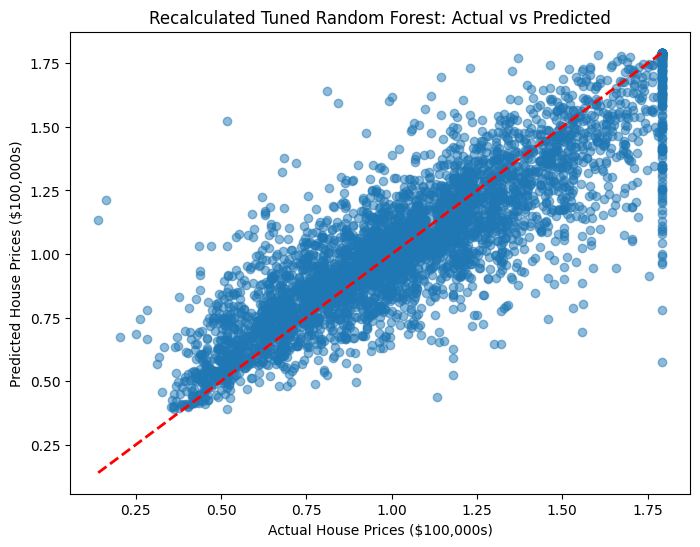

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Use the recalculated predictions
rf_predictions_log = best_rf_model.predict(X_test_scaled)
rf_predictions_original = np.expm1(rf_predictions_log)
y_test_original = np.expm1(y_test_log)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, rf_predictions_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices ($100,000s)")
plt.ylabel("Predicted House Prices ($100,000s)")
plt.title("Recalculated Tuned Random Forest: Actual vs Predicted")
plt.show()

In [110]:
import joblib

# Save the tuned model
joblib.dump(best_rf_model, 'recalculated_tuned_house_price_model.pkl')
print("Model saved as 'recalculated_tuned_house_price_model.pkl'")

Model saved as 'recalculated_tuned_house_price_model.pkl'
